## Assignment 6: Multivariate exploratory visualization

In Assignment 5, you got a feel for the basic analytic capabilites of `pandas` and `seaborn`, and learned how to calculate descriptive statistics and generate univariate plots.  In many cases, however, you are going to want to explore interrelationships between multiple characteristics of your data.  In this course, we are going to address this with __multivariate exploratory visualization__.  

Multivariate visualization can take a lot of forms, and can get quite complex!  We're just going to start with the basics here and work our way up to more complicated visualizations - and fortunately `seaborn` can do quite a lot of things.  

Our data for today's notebook are going to come from the World Bank's World Development Indicators API.  You'll learn a lot more about APIs in a few weeks; for now, you can think of it as a way that we can programmatically get access to the World Bank's data.  The World Bank's data catalog contains social and economic indicators for countries around the world dating all the way back to 1960, and is one of the world's foremost resources for development data.  An added bonus: access to the data is built-in to `pandas`!  One caveat: the next release of `pandas` will move this functionality to an external package called `pandas-datareader`, which is installable from `pip`, so watch out for that; for now, we can still use the functionality in the `pandas.io` module.   

To get started, run the cell below to load the required packages and tell the Jupyter Notebook to show figures inline.  

In [1]:
import pandas as pd
import seaborn as sns
from pandas.io import wb

%matplotlib inline

Note that I've switched to the standard import for `seaborn` - `import seaborn as sns`.  As you get more skilled with Python, you'll be using online documentation and tutorials to help you with your data analysis.  `import seaborn as sns` is the standard around the web and in the `seaborn` docs, so I'm making our notebooks consistent with these standards.  

This notebook will be organized around different types of exploratory visualizations, which are each best-suited for different types of data.  As such, we'll be making multiple calls to the World Bank API throughout the notebook to get different datasets.  

### Getting data from the World Bank

Access to World Bank data in `pandas` is done through the `wb` module, which we've imported into our namespace.  World Bank indicators are defined by __indicator codes__, which are unique strings that represent the given indicators.  To look up codes for data we might be interested in, we can use the `wb.search` function.  Let's try life expectancy: 

In [2]:
wb.search('life expectancy')

,id,name,source,sourceNote,sourceOrganization,topics
7980,SP.DYN.LE00.FE.IN,"Life expectancy at birth, female (years)",World Development Indicators,Life expectancy at birth indicates the number ...,b'(1) United Nations Population Division. Worl...,Aid Effectiveness ; Health ; Social Developm...
7981,SP.DYN.LE00.IN,"Life expectancy at birth, total (years)",World Development Indicators,Life expectancy at birth indicates the number ...,b'Derived from male and female life expectancy...,Health
7982,SP.DYN.LE00.MA.IN,"Life expectancy at birth, male (years)",World Development Indicators,Life expectancy at birth indicates the number ...,b'(1) United Nations Population Division. Worl...,Aid Effectiveness ; Social Development ; Hea...
9078,UIS.SLE.0,School life expectancy (years). Pre-primary. ...,Education Statistics,School life expectancy (years). Pre-primary. T...,b'UNESCO Institute for Statistics',Education
9079,UIS.SLE.0.F,School life expectancy (years). Pre-primary. ...,Education Statistics,School life expectancy (years). Pre-primary. F...,b'UNESCO Institute for Statistics',Education
9080,UIS.SLE.0.M,School life expectancy (years). Pre-primary. ...,Education Statistics,School life expectancy (years). Pre-primary. M...,b'UNESCO Institute for Statistics',Education
9081,UIS.SLE.123,School life expectancy (years). Primary to se...,Education Statistics,School life expectancy (years). Primary to sec...,b'UNESCO Institute for Statistics',Education
9082,UIS.SLE.123.F,School life expectancy (years). Primary to se...,Education Statistics,School life expectancy (years). Primary to sec...,b'UNESCO Institute for Statistics',Education
9083,UIS.SLE.123.GPI,Gender parity index for school life expectancy...,Education Statistics,Gender parity index for school life expectancy...,b'UNESCO Institute for Statistics',Education
9084,UIS.SLE.123.M,School life expectancy (years). Primary to se...,Education Statistics,School life expectancy (years). Primary to sec...,b'UNESCO Institute for Statistics',Education


Looks like there are a lot of indicators available!  Let's use the most general one, `SP.DYN.LE00.IN`, and assign it to a variable.  

In [3]:
lex_code = 'SP.DYN.LE00.IN'

Our first task is to produce some charts that compare life expectancy at birth between the United States and several peer economies.  To do this, we're going to need to know __country codes__.  The `wb` module takes either two-digit __iso2__ codes or three-digit __iso3__ codes; Wikipedia is probably the easiest place to look them up.  

* ISO-2: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2
* ISO-3: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3

Let's make a list of countries -- the USA, the UK, Germany, China, Canada, Japan, and France -- for which we'd like to chart life expectancy.  

In [4]:
ctrys = ['US', 'GB', 'DE', 'CN', 'CA', 'JP', 'FR'] 

We can now make a call to the World Bank API with the `wb.download()` function.  We pass to the function our indicator code and our list of countries; we also specify a start and end date, which will be the same in this case as we only want one year.  We'll assign the resulting data frame to a variable named `lex`, for life expectancy at birth.  

In [5]:
lex = wb.download(indicator = lex_code, country = ctrys, start = 2013, end = 2013)

lex

,,SP.DYN.LE00.IN
country,year,
Canada,2013,81.401122
China,2013,75.353024
Germany,2013,81.043902
France,2013,81.968293
United Kingdom,2013,80.956098
Japan,2013,83.331951
United States,2013,78.841463


We've gotten back a data frame with a single column - "SP.DYN.LE00.IN", and "country" and "year" values in the index.  We now can get ready for plotting!

### Bar charts and dot plots

Two common types of charts for comparing quantities, as we discussed in class, are bar charts and dot plots.  __Bar charts__ represent values as proportional to the height of bars, and __dot plots__ represent values as dots along a given axis.  

Many plot types are available in `pandas` through the built-in `.plot()` data frame method, and also have equivalent functions in `seaborn`.  In `pandas` plotting, if no data arguments are passed to the `plot` method, `pandas` will assume that the x-axis values are in the index, and then will plot numeric columns as data series.  For example, we can create a bar plot below.  Also notice the use of the `sns.set()` function.  Within `seaborn`, you can choose from a variety of built-in plot templates: `"white"`, `"dark`", `"darkgrid"`, `"whitegrid"`, and `"ticks"`, and you can use the `set` function to make all of your plots in this particular style.  

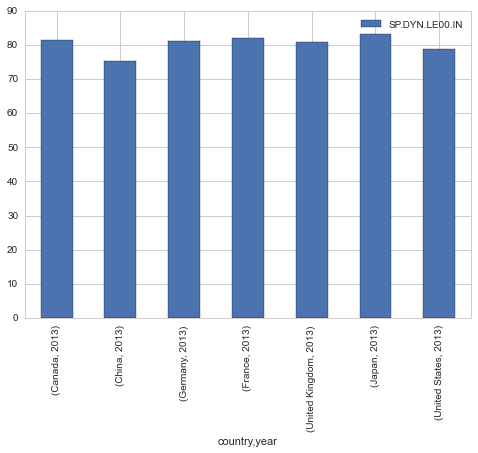

In [6]:
sns.set(style = 'whitegrid')

lex.plot(kind = 'bar')

The `pandas` `.plot()` method is excellent for basic exploratory plotting.  However, `seaborn` is an excellent choice for creating publication-quality plots with a minimum of code as well.  To create plots in `seaborn`, we'll want to make sure that all of our data values are represented in columns; as such, we'll use the `.reset_index()` method to reset the index of our data frame.  

Notice, however, that I'm resetting the index of my data frame and creating a new data frame, `lex2`, from that method call; this will preserve my `lex` data frame in case I need to go back to it.  If you prefer to modify the original data frame in place, you would use the syntax `lex.reset_index(inplace = True)` to do this.  

We'll then rename the column representing life expectancy to `'lex'` which is easier to work with by modifying the `columns` attribute.  

In [7]:
lex2 = lex.reset_index()

lex2.columns = ['country', 'year', 'lex']

lex2

,country,year,lex
0,Canada,2013,81.401122
1,China,2013,75.353024
2,Germany,2013,81.043902
3,France,2013,81.968293
4,United Kingdom,2013,80.956098
5,Japan,2013,83.331951
6,United States,2013,78.841463


Bar charts in `seaborn` are available from the `barplot` function.  The function has a lot of optional parameters; however, to get a bar chart to display, all you need are columns to map onto the x and y axes, and a dataset you'd like to plot.  Let's try a horizontal bar plot with the country name on the y-axis and data values on the x-axis: 

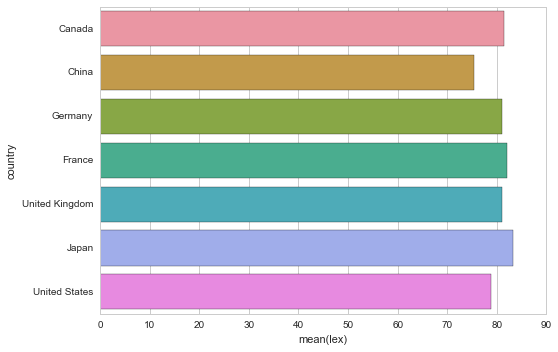

In [8]:
sns.barplot(x = 'lex', y = 'country', data = lex2)

Looks good!  There is much more you can do with the plot - customizing colors, axis labels, and beyond.  We'll be addressing plot customization beginning in Week 10.  However, there are still some small things that we can do to make our plots more readable.  Recall from class our discussion of the `.sort()` data frame method, in which we can arrange our data based on one or more column values.  When creating bar charts, it is a good idea to show sorted data values, which makes it easier for the reader to make comparisons.  

We have a few options here.  We could sort our data frame in place, then supply it to the `data` parameter of `barplot`: 

```python
lex2.sort('lex', ascending = False, inplace = True)
sns.barplot(x = 'lex', y = 'country', data = lex2)
```

We could create a new sorted data frame from the `sort` operation and use it instead: 

```python
lex_sorted = lex2.sort('lex', ascending = False)
sns.barplot(x = 'lex', y = 'country', data = lex_sorted)
```

Or, we could tell `seaborn` to work with a sorted data frame within the function call.  

```python
sns.barplot(x = 'lex', y = 'country', data = lex2.sort('lex', ascending = True))
```

All of these will work.  Recall that the `sort` method takes either a single column or a list of columns, and defaults to sorting in ascending order; if you want descending order you will need to tell the method `ascending = False`.  Let's try the second option I discussed.  

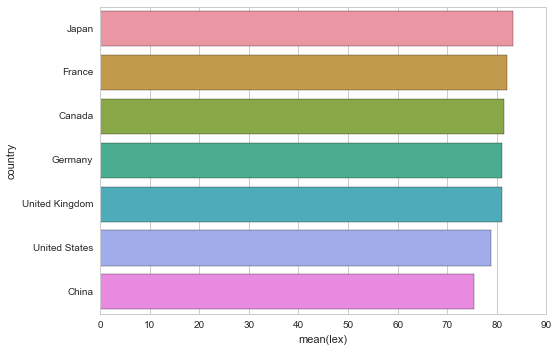

In [9]:
lex_sorted = lex2.sort('lex', ascending = False)

sns.barplot(x = 'lex', y = 'country', data = lex_sorted)

Sorting the data allows us to more clearly see how the values vary.  However, as we discussed in class, it is essential that bar charts have an origin of 0, as bar heights are used to make comparisons.  For values that are similar - but for which the differences are still significant - the __dot plot__ may be preferable, which represents values by the position of dots along a a value axis.  Indeed, many data visualization experts prefer dot plots to bar charts, as they argue that it is easier for humans to perceive dot position instead of bar heights.  Further, dot plots are not constrained by the zero-axis-origin rule.  

Dot plots in `seaborn` are available via the `stripplot` function; for reference, "strip plot" is another name for dot plot.  The syntax you'll use is identical to `barplot` in this example.  

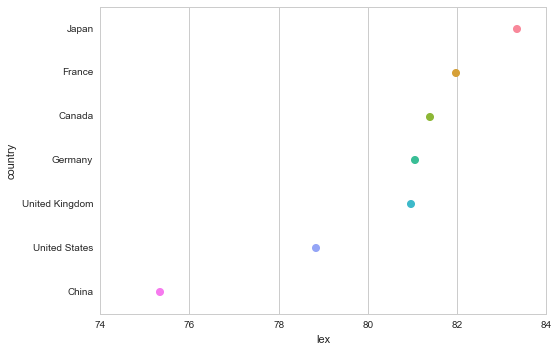

In [10]:
sns.stripplot(x = 'lex', y = 'country', data = lex_sorted)

### Scatter plots

Bar charts and dot plots are excellent choices for visualizing quantitative variations amongst different categories, like countries.  However: what if you want to visualize how two quantitative attributes might covary?  The most common exploratory visualization technique for this type of scenario is the __scatter plot__.  

Scatter plots most closely resemble the base __Cartesian coordinate system__ that underpins the charts we've learned how to make to this point.  In fact, scatter plots are likely familiar to you from grade-school mathematics in the way they represent the joint distributions of two attributes.  The value for one attribute is represented by the x-coordinate (the horizontal axis) on the chart, and the other attribute is represented by the y-coordinate (the vertical axis).  

Let's give this a try.  We'll need some more data from the World Bank to accomplish this.  We'll be comparing the distributions of countries' __total fertility rate__, which measures the average number of children per woman (more or less) in a country, and countries' __infant mortality rate__, which measures the number of deaths to infants aged 1 and below per 1000 live births.  We'll grab data for all countries for 2012; I'm getting rid of the rows that don't represent countries and that have missing values (you'll learn how to do this yourselves in the next couple weeks)

In [11]:
df = wb.download(indicator = ['SP.DYN.TFRT.IN', 'SP.DYN.IMRT.IN'], country = 'all', start = 2012, end = 2012)

df2 = df[34:].dropna()

df2.columns = ['tfr', 'imr']

df2.head()

,,tfr,imr
country,year,,
Afghanistan,2012,5.141,71.7
Albania,2012,1.760,13.8
Algeria,2012,2.820,22.4
Angola,2012,5.979,104.1
Antigua and Barbuda,2012,2.102,6.8


Let's now take a quick peek at the characteristics of our data: 

In [12]:
df2.describe()

,tfr,imr
count,185.000000,185.000000
mean,2.901976,26.667027
std,1.447172,24.185736
min,1.260000,1.600000
25%,1.800000,6.800000
50%,2.389000,16.000000
75%,3.844000,39.700000
max,7.574000,104.100000


You can get a sense here of the wide variations among countries; TFR varies from 1.26 children/woman to 7.57, and infant mortality ranges from 1.6 infant deaths/1000 live births to over 104, which is astonishing in 2012.  

So how do these two distributions of values covary?  We can assess this quickly with the versatile `.plot()` method in `pandas`.  

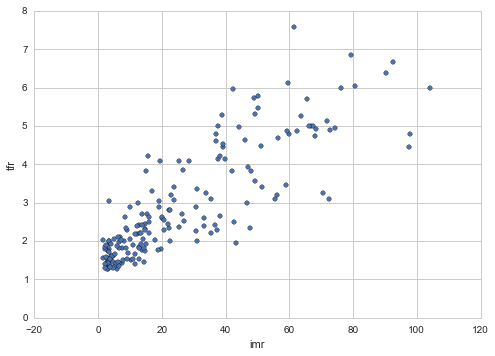

In [13]:
df2.plot(x = 'imr', y = 'tfr', kind = 'scatter')

Notice the shape formed by the distribution of dots.  It appears from our plot that as infant mortality increases, fertility increases as well, suggesting a __positive relationship__ between the two distributions.  Recall from class that this statistical relationship can be quantified with a __correlation coefficient__.  Let's check this out by using the `.corr()` method available to us in `pandas`: 

In [14]:
df2['imr'].corr(df2['tfr'])

0.84677101176557701

As we discussed in class, Pearson's correlation coefficient (which is used here) ranges between -1 and +1, with positive values suggestive of a positive correlation and vice versa.  This statistic conforms with what we see in the scatter plot.  However: remember to beware of spurious correlations!  We'll learn some more methods for investigating this graphically throughout the semester.  

Scatter plots are also available in `seaborn`, with some additional options.  Both the `lmplot` ("linear model plot") and `regplot` ("regression plot") functions will get this done.  Let's try: 

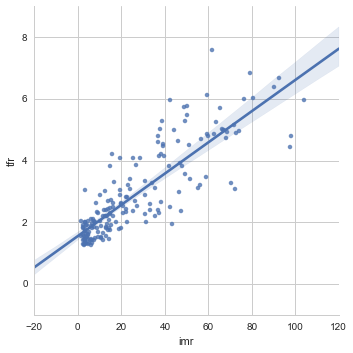

In [15]:
sns.lmplot(x = 'imr', y = 'tfr', data = df2)

The plot is similar, but notice the superimposition of a __regression line__ over the dots.  You can think of this line as a visual representation of the correlation between the two variables; the upward slope, again, suggests a positive relationship.  This line also presumes that the relationship between the two variables is __linear__, which is not always the case; we'll discuss this a bit more later in the semester.  

`seaborn` also has additional options for drawing multi-dimensional plots.  You'll learn much more about this in the second half of the semester, but here's a preview of the `jointplot` function.  

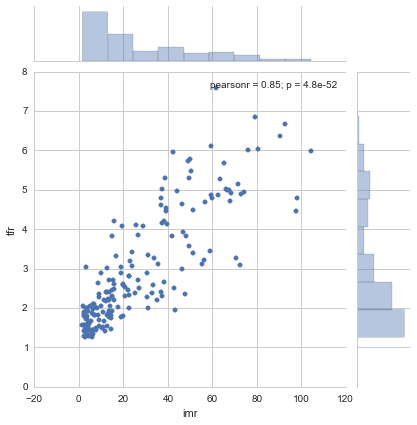

In [16]:
sns.jointplot(x = 'imr', y = 'tfr', data = df2)

`seaborn` draws a scatter plot, but with histograms of the two data distributions on the margins, and includes the Pearson correlation coefficient!  

## Exercises

As usual, I'll ask you to do some of this on your own now in the form of a few small exercises.  Take care to answer all of the questions!  

__Exercise 1__: Explain, in your own words, the differences between a bar chart and a dot plot.  When might one of these charts be preferable to the other?  Write your response below in this Markdown cell.  

---

As we know, recent economic crises have had widely disparate impacts across the European Union.  You'll be analyzing these disparate impacts by downloading unemployment data for European Union members from the World Bank and plotting it.  

Exercises 2 and 3 will use data from the cell below; run the cell to fetch the data from the World Bank and create a data frame from it called `ex2`.

In [19]:
eu_countries = ['BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'GR', 'ES', 'FR', 'HR', 
               'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT', 
               'RO', 'SI', 'SK', 'FI', 'SE', 'GB']

ex2 = wb.download(indicator = "SL.UEM.TOTL.ZS", country = eu_countries, start = 2013, end = 2013)

ex2.reset_index(inplace = True)

ex2.columns = ['country', 'year', 'unemployment']

__Exercise 2__: Sort your data frame in descending order.  Which EU country had the highest unemployment rate in 2013?  Which EU country had the lowest rate?  

__Exercise 3__: Use `seaborn` to create either a dot plot or bar chart of unemployment in Europe using your sorted data frame. 

---

In Exercises 4 and 5, you are going to examine the (potential) relationship between rates of tuberculosis per 100,000 people and the percent of the population with access to improved sanitation facilities (e.g. sewers/flush toilets) in 2013 for countries in the world.  

Run the cell below to return a data frame named `ex4` with the necessary data.  

In [33]:
ex4 = wb.download(indicator = ['SH.TBS.INCD', 'SH.STA.ACSN'], country = 'all', start = 2013, end = 2013)

ex4 = ex4[34:].dropna()

ex4.columns = ['tb_rate', 'impr_sanitation']

__Exercise 4__: Use `seaborn` to draw a scatter plot that shows the relationship between rates of infection for tuberculosis and access to improved sanitation facilities.  

__Exercise 5:__ Calculate the correlation coefficient for countries' rates of TB infections and improved santitation access.  What appears to be the relationship between the two variables?  